# Advanced concepts in Pandas

## Agenda

- Introduction to Dataframes and series
- Loading data from different sources
- Indexing and selecting Data
- Dataframe operations
- Data normalization and missing data
- Visualization


## Introduction to Dataframes and series

### Series

Series is a one-dimensional labelled array capable of holding any datatype(int, float, string, python objects etc). The axis labells are collectively labelled as an index.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Creating pandas series   
series = pd.Series(data, index=index)  

Here data can be of type dict, ndaaray or scalar values  
index is a list of labels  

### Series creation

In [3]:
series = pd.Series(np.random.rand(5), index=['a', 'b', 'c', 'd', 'e'])
print(series)
print(series.index)

a    0.258001
b    0.828173
c    0.629834
d    0.748501
e    0.795523
dtype: float64
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [4]:
# Creating series from dict

dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
series = pd.Series(dict)
series

a    1
b    2
c    3
d    4
dtype: int64

### Operations

In [117]:
#Data access

print(series['a']) #Accessing with key
print(series[1]) #Accessing using index
print(series[:2]) #Accessing using index range
print(series[series > 2]) #Conditional access
print(series.get('a')) ##Accessing using get



0.005866201567144347
0.36343451031785445
a    0.005866
b    0.363435
Name: numbers-2, dtype: float64
Series([], Name: numbers-2, dtype: float64)
0.005866201567144347
c    0.375479
Name: numbers-2, dtype: float64


In [118]:
print(series[-1:])

c    0.375479
Name: numbers-2, dtype: float64


In [6]:
#Arthematic operations

print(np.sum(series)) #Sum
print(np.exp(series)) #Exponential operation


10
a     2.718282
b     7.389056
c    20.085537
d    54.598150
dtype: float64


In [7]:
#Vectorized operations and label alignment with Series

print(series + series) #Adding two series 

print(series * 2) #multiplication of series object with scalar value

a    2
b    4
c    6
d    8
dtype: int64
a    2
b    4
c    6
d    8
dtype: int64


In [8]:
#Series name attribute

series = pd.Series(np.random.rand(3), index = ['a', 'b', 'c'], name='numbers')
print(series)
series = series.rename('numbers-2')
print(series)

a    0.005866
b    0.363435
c    0.375479
Name: numbers, dtype: float64
a    0.005866
b    0.363435
c    0.375479
Name: numbers-2, dtype: float64


## Dataframes

Dataframe is 2-dimensional labelled data structure with columns of potentially different types.   
Daataframes are similar to spreadsheet, sql tables or dictionary of series objects. This the widely used datastructure in pandas. Dataframe accepts various inputs such as

- dict of 1d array, lists, dicts or series
- 2-d numpy ndarray.
- structured or record nd-array
- series
- another dataframe



### Creation from dictionaries

In [9]:

data = {'one': pd.Series(np.random.rand(4), index=['a', 'b', 'c', 'd']),
       'two': pd.Series(np.random.rand(4), index=['a', 'b', 'c', 'v'])}

df = pd.DataFrame(data)
df

,one,two
a,0.593751,0.436507
b,0.238370,0.551422
c,0.003035,0.477042
d,0.672194,NaN
v,NaN,0.358500


In [10]:
df = pd.DataFrame(data, index=['a', 'b', 'c'], columns=['two', 'three'])
df

,two,three
a,0.436507,NaN
b,0.551422,NaN
c,0.477042,NaN


In [11]:
df.index

Index(['a', 'b', 'c'], dtype='object')

In [12]:
df.columns

Index(['two', 'three'], dtype='object')

### From records

In [13]:
data = np.zeros((2, ), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])
data[:] = [(1, 2., 'Hello'), (2, 3., "World")]
df = pd.DataFrame(data)
df

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


### From list of dictionaries

In [14]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data2)
df

,a,b,c
0,1,2,NaN
1,5,10,20.0


### From dict of Tuples

In [15]:
data = {('A', 1, 2), ('B', 3, 5), ('C', 4, 6)}
df = pd.DataFrame(data, columns=['one', 'two', 'three'])
df

,one,two,three
0,B,3,5
1,C,4,6
2,A,1,2


## Loading data from different sources

In [16]:
#Reading from csv file
df = pd.read_csv('../hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
#Saving the dataframe as json file
df.to_json('../hour.json')


In [18]:
#Reading from json file
df = pd.read_json('../hour.json')
df.head()

,atemp,casual,cnt,dteday,holiday,hr,hum,instant,mnth,registered,season,temp,weathersit,weekday,windspeed,workingday,yr
0,0.2879,3,16,2011-01-01,0,0,0.81,1,1,13,1,0.24,1,6,0.0000,0,0
1,0.2727,8,40,2011-01-01,0,1,0.80,2,1,32,1,0.22,1,6,0.0000,0,0
10,0.3939,12,36,2011-01-01,0,10,0.76,11,1,24,1,0.38,1,6,0.2537,0,0
100,0.1970,6,115,2011-01-05,0,9,0.37,101,1,109,1,0.22,1,3,0.3284,1,0
1000,0.3939,7,256,2011-02-14,0,8,0.40,1001,2,249,1,0.38,1,1,0.4627,1,0


In [19]:
#Storing as picke file

df.to_pickle('../hour.pkl')

In [20]:
#Reading from pickle fie

df = pd.read_pickle('../hour.pkl')
df.head()

,atemp,casual,cnt,dteday,holiday,hr,hum,instant,mnth,registered,season,temp,weathersit,weekday,windspeed,workingday,yr
0,0.2879,3,16,2011-01-01,0,0,0.81,1,1,13,1,0.24,1,6,0.0000,0,0
1,0.2727,8,40,2011-01-01,0,1,0.80,2,1,32,1,0.22,1,6,0.0000,0,0
10,0.3939,12,36,2011-01-01,0,10,0.76,11,1,24,1,0.38,1,6,0.2537,0,0
100,0.1970,6,115,2011-01-05,0,9,0.37,101,1,109,1,0.22,1,3,0.3284,1,0
1000,0.3939,7,256,2011-02-14,0,8,0.40,1001,2,249,1,0.38,1,1,0.4627,1,0


In [21]:
#Reading from database

import sqlite3
sql = sqlite3.connect("../tripadvisor.db")

In [22]:
#The documents are stored in the "documents" table. This will now be read into a DataFrame.
docs = pd.read_sql_query("SELECT * FROM documents", sql, parse_dates=["time"]) 

In [23]:
docs.head()


,id,thread_id,topic,title,content,time,links,url,user_name
0,31,28,Student hangouts at NYU,,What are the popular hangouts at NYU? I will b...,2004-08-26 16:58:00,{},None,takjf
1,45,38,Favorite restaurant repeat visits in Manhattan,,I don't get to the city often so I normally do...,2004-08-26 17:43:00,"{""Park Avenue"",""Union Square Cafe""}",None,Jpan99
2,74,65,Park and ride the Train into NYC,,If you are coming from upstate NY and want to ...,2004-08-26 22:41:00,"{NYC,""Metro North"",Poughkeepsie,""Grand Central...",None,Tweetypez
3,213,157,The Big Apple with 5 year old,,I have a five-year-old boy who LOVES buildings...,2004-08-27 21:33:00,"{NYC,""Bronx Zoo"",""Empire State Building""}",None,TGlenn04
4,239,179,Upper East Side hotel search,,Looking for hotel or B&B in area near 200 East...,2004-08-28 01:00:00,"{""Upper East Side""}",None,mom


## Indexing and selecting Data

### Dataframe column access

In [24]:
docs['user_name'].head() #Accessing single column

0        takjf
1       Jpan99
2    Tweetypez
3     TGlenn04
4          mom
Name: user_name, dtype: object

In [25]:
docs.user_name.head()

0        takjf
1       Jpan99
2    Tweetypez
3     TGlenn04
4          mom
Name: user_name, dtype: object

In [26]:
docs.user_name.values #Getting the array of values

array(['takjf', 'Jpan99', 'Tweetypez', ..., 'SINYTraveler',
       'dolceincorso', 'Northern_Traveler00'], dtype=object)

In [27]:
docs[['user_name', 'topic']].head() #Accessing two attributes

,user_name,topic
0,takjf,Student hangouts at NYU
1,Jpan99,Favorite restaurant repeat visits in Manhattan
2,Tweetypez,Park and ride the Train into NYC
3,TGlenn04,The Big Apple with 5 year old
4,mom,Upper East Side hotel search


### Sclicing ranges

In [28]:
docs[:5] #accessing first five records

,id,thread_id,topic,title,content,time,links,url,user_name
0,31,28,Student hangouts at NYU,,What are the popular hangouts at NYU? I will b...,2004-08-26 16:58:00,{},None,takjf
1,45,38,Favorite restaurant repeat visits in Manhattan,,I don't get to the city often so I normally do...,2004-08-26 17:43:00,"{""Park Avenue"",""Union Square Cafe""}",None,Jpan99
2,74,65,Park and ride the Train into NYC,,If you are coming from upstate NY and want to ...,2004-08-26 22:41:00,"{NYC,""Metro North"",Poughkeepsie,""Grand Central...",None,Tweetypez
3,213,157,The Big Apple with 5 year old,,I have a five-year-old boy who LOVES buildings...,2004-08-27 21:33:00,"{NYC,""Bronx Zoo"",""Empire State Building""}",None,TGlenn04
4,239,179,Upper East Side hotel search,,Looking for hotel or B&B in area near 200 East...,2004-08-28 01:00:00,"{""Upper East Side""}",None,mom


In [29]:
docs[-5:] #Accessing last five document

,id,thread_id,topic,title,content,time,links,url,user_name
1605587,93134017,11715212,Weekend Visit Itinerary,Re: Weekend Visit Itinerary,Agree you will probably get to your hotel abou...,2018-07-03 20:42:00,"{JFK,""Central Park""}",None,nytraveler2016
1605588,93134529,11716035,Restaurant by Pier 83,Re: Restaurant by Pier 83,Legacy records is a hot new restaurant in easy...,2018-07-03 21:26:00,{},None,here&there
1605589,93135489,11715780,Traveling to the Game from southeast NY.,Re: Traveling to the Game from southeast NY.,For readers who may want to take Metro North b...,2018-07-03 23:06:00,"{""Metro North"",…mta.info/mnr/html/yankees/yank...",None,SINYTraveler
1605590,93137471,11713961,I just can't decide which neighborhood...,Re: I just can't decide which neighborhood...,"Lizzieandlzzy, actually my son asked me to inc...",2018-07-04 00:53:00,{},None,dolceincorso
1605591,93142799,11716035,Restaurant by Pier 83,Re: Restaurant by Pier 83,We had a very nice dinner earlier this year at...,2018-07-04 06:10:00,"{Elizabeth,Becco}",None,Northern_Traveler00


In [30]:
docs.iloc[:5, 4:1] #five rows of first column

,id
0,31
1,45
2,74
3,213
4,239


In [31]:
docs.iloc[0] #First row of the document

id                                                          31
thread_id                                                   28
topic                                  Student hangouts at NYU
title                                                         
content      What are the popular hangouts at NYU? I will b...
time                                       2004-08-26 16:58:00
links                                                       {}
url                                                       None
user_name                                                takjf
Name: 0, dtype: object

In [32]:
docs.iloc[:, 4:2].head() #Last column of the document

0        takjf
1       Jpan99
2    Tweetypez
3     TGlenn04
4          mom
Name: user_name, dtype: object

**NOTE:** iloc returns series when single columns is selected or dataframe will be returned.

In [33]:
docs.loc['a'] ##Location based access

id                                                          45
thread_id                                                   38
topic           Favorite restaurant repeat visits in Manhattan
title                                                         
content      I don't get to the city often so I normally do...
time                                       2004-08-26 17:43:00
links                      {"Park Avenue","Union Square Cafe"}
url                                                       None
user_name                                               Jpan99
Name: 1, dtype: object

In [34]:
docs.loc[[10, 11], ['id', 'user_name']] #Accessing specific columns using location

,id,user_name
10,403,sworl
11,404,sworl


In [35]:
docs.loc[docs['user_name'] == 'Tweetypez'] ##Boolean or logical indexing using loc

,id,thread_id,topic,title,content,time,links,url,user_name
2,74,65,Park and ride the Train into NYC,,If you are coming from upstate NY and want to ...,2004-08-26 22:41:00,"{NYC,""Metro North"",Poughkeepsie,""Grand Central...",None,Tweetypez


In [36]:
docs.loc[docs['user_name'] == 'Tweetypez', 'topic'] ##Accessing specific column based on the condition

2    Park and ride the Train into NYC
Name: topic, dtype: object

## Dataframe operations

### Simple aggregated functions

|Aggregation	|Description|
|---------------|------------|
|count()|	Total number of items|
|first(), last()|First and last item|
|mean(), median()|	Mean and median|
|min(), max()|	Minimum and maximum|
|std(), var()|	Standard deviation and variance|
|mad()	|Mean absolute deviation|
|prod()	|Product of all items|
|sum()	|Sum of all items|

In [37]:
docs = docs[['id', 'thread_id', 'user_name']][:100]
docs.mean()

id           1292.19
thread_id     549.61
dtype: float64

In [38]:
docs.std()

id           685.136803
thread_id    290.944019
dtype: float64

In [39]:
docs.sum()

id                                                      129219
thread_id                                                54961
user_name    takjfJpan99TweetypezTGlenn04mommgold64lulushik...
dtype: object

### GroupBy: Split, Apply, Combine

In [40]:
docs.groupby('user_name').sum().head()


,id,thread_id
user_name,,
Aileen,1704,822
Aussie_traveller,3711,1654
Carl_Lewis_2004,1942,992
Carpenter,4824,2211
Creta_Palace,598,309


In [41]:
docs.groupby(['user_name', 'thread_id']).max().head()

id
user_name        thread_id      
Aileen           411         984
Aussie_traveller 701        1856
                 953        1855
Carl_Lewis_2004  992        1942
Carpenter        1050       2417

In [42]:
docs.groupby('user_name').aggregate(['min', np.median, max]).head() ##Aggregation


id               thread_id              
                   min  median   max       min  median   max
user_name                                                   
Aileen             720   852.0   984       411   411.0   411
Aussie_traveller  1855  1855.5  1856       701   827.0   953
Carl_Lewis_2004   1942  1942.0  1942       992   992.0   992
Carpenter         2407  2412.0  2417      1050  1105.5  1161
Creta_Palace       598   598.0   598       309   309.0   309

In [43]:
docs.groupby('user_name').aggregate({'id': 'min',
                             'thread_id': 'max'}).head()  ##Aggregation

,id,thread_id
user_name,,
Aileen,720,411
Aussie_traveller,1855,953
Carl_Lewis_2004,1942,992
Carpenter,2407,1161
Creta_Palace,598,309


In [44]:
 docs.groupby('user_name').transform(lambda x: x - 100).head() ##Applying transformation

,id,thread_id
0,-69,-72
1,-55,-62
2,-26,-35
3,113,57
4,139,79


### Merge, Join and concatinate

In [45]:
#Concatinating dataframes

df1 = docs[['id', 'thread_id', 'user_name']][:5]
df1


,id,thread_id,user_name
0,31,28,takjf
1,45,38,Jpan99
2,74,65,Tweetypez
3,213,157,TGlenn04
4,239,179,mom


In [46]:
df2 = docs[['id', 'thread_id', 'user_name']][10:15]
df2

,id,thread_id,user_name
10,403,210,sworl
11,404,157,sworl
12,405,229,sworl
13,406,281,sworl
14,438,229,Dublin


In [47]:
frames = [df1, df2]
concat = pd.concat(frames) ##COncatination
concat

,id,thread_id,user_name
0,31,28,takjf
1,45,38,Jpan99
2,74,65,Tweetypez
3,213,157,TGlenn04
4,239,179,mom
10,403,210,sworl
11,404,157,sworl
12,405,229,sworl
13,406,281,sworl
14,438,229,Dublin


In [48]:
df1.append(df2) ##COncatination using append


,id,thread_id,user_name
0,31,28,takjf
1,45,38,Jpan99
2,74,65,Tweetypez
3,213,157,TGlenn04
4,239,179,mom
10,403,210,sworl
11,404,157,sworl
12,405,229,sworl
13,406,281,sworl
14,438,229,Dublin


In [49]:
users = docs['user_name'][:15]

pd.concat([concat,users], axis=1) #COncatinating columns

,id,thread_id,user_name,user_name
0,31.0,28.0,takjf,takjf
1,45.0,38.0,Jpan99,Jpan99
2,74.0,65.0,Tweetypez,Tweetypez
3,213.0,157.0,TGlenn04,TGlenn04
4,239.0,179.0,mom,mom
5,NaN,NaN,NaN,mgold64
6,NaN,NaN,NaN,lulu
7,NaN,NaN,NaN,shiksa67
8,NaN,NaN,NaN,shiksa67
9,NaN,NaN,NaN,roisinlogue


In [51]:
#Merging datframes

df1 = docs[['id', 'thread_id']][:5]
df2 = docs[['id', 'user_name']][:5]
merger = pd.merge(df1, df2, on='id')
merger

,id,thread_id,user_name
0,31,28,takjf
1,45,38,Jpan99
2,74,65,Tweetypez
3,213,157,TGlenn04
4,239,179,mom


## Data normalization and Standardization

Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.  

It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in k-nearest neighbors and in the preparation of coefficients in regression.


In [57]:
# Normalize the data attributes for the Iris dataset.
from sklearn.datasets import load_iris
from sklearn import preprocessing
# load the iris dataset
iris = load_iris()
print(iris.data.shape)
# separate the data from the target attributes
X = iris.data
y = iris.target
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

(150, 4)


In [60]:
df = pd.DataFrame(normalized_X)
df.head()

,0,1,2,3
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance).

It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.

In [62]:
# Standardize the data attributes for the Iris dataset.
from sklearn.datasets import load_iris
from sklearn import preprocessing
# load the Iris dataset
iris = load_iris()
print(iris.data.shape)
# separate the data and target attributes
X = iris.data
y = iris.target
# standardize the data attributes
standardized_X = preprocessing.scale(X)

(150, 4)


In [67]:
df = pd.DataFrame(standardized_X)
df.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Handling missing values

In [80]:
# Checking for Missing values in the dataframe
df = pd.DataFrame(X)
pd.isna(df) # True if the data is NaN
df.notna() # True if the data is not NaN
df == np.nan # True if data is NaN

# Filling Na values with scalar values
df.fillna(0)
df.fillna(method='pad', limit=1) # Fill values forward

df.fillna(method='bfill', limit=1) # fill values backward
df.fillna(df.mean()).head() # Fill NA values with mean value of the dataframe
df.dropna() # Dropping NaN values

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visualization

<Figure size 432x288 with 0 Axes>

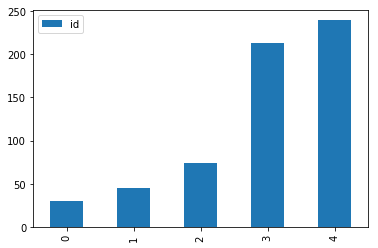

In [107]:
plt.figure()
df2.plot.bar()  #Bar Chart

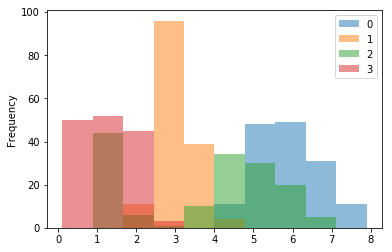

In [90]:
df.plot.hist(alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d1b357eb8>,
      dtype=object)

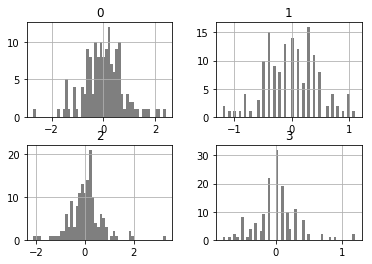

In [92]:
df.diff().hist(color='k', alpha=0.5, bins=50)  #Histograms

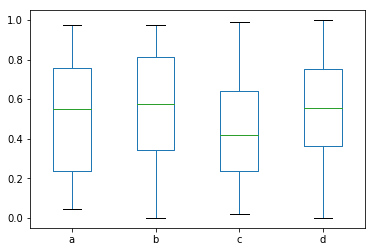

In [105]:
df.plot.box()   #Box plot

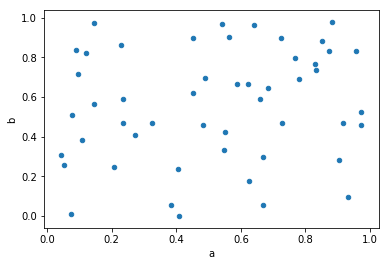

In [104]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])  #Scatter plot
df.plot.scatter(x='a', y='b')

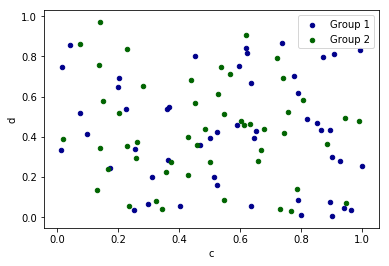

In [102]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);  #Scatter plot

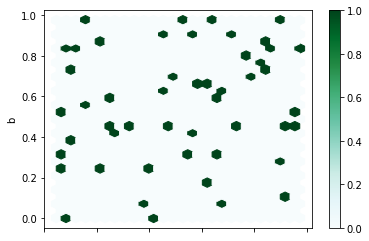

In [108]:
 df.plot.hexbin(x='a', y='b', gridsize=25) #Hexogonal plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d4bf8bba8>,
      dtype=object)

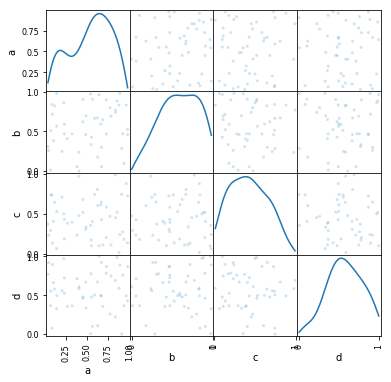

In [111]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde') #Scatter matrix plot

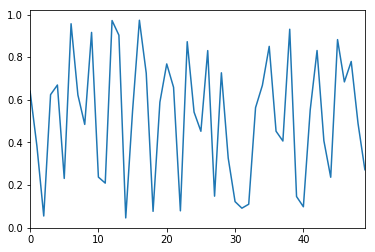

In [114]:
df['a'].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d417d4470>,
      dtype=object)

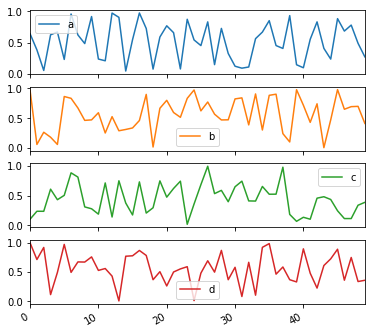

In [116]:
df.plot(subplots=True, figsize=(6, 6)) #Sub plot